<a href="https://colab.research.google.com/github/PatrickBassan/Chuville/blob/main/Chuville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ydata-synthetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.4 MB/s 
     |████████████████████████████████| 31.2 MB 92.3 MB/s 
     |████████████████████████████████| 511.7 MB 153 bytes/s 
     |████████████████████████████████| 11.7 MB 24.7 MB/s 
     |████████████████████████████████| 17.1 MB 63 kB/s 
     |████████████████████████████████| 11.3 MB 46.0 MB/s 
     |████████████████████████████████| 280 kB 77.3 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 33.8 MB 426 kB/s 
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6360 sha256=af5115caaea611ab538f455efd4e176564f36b8e9317c6a9bb943b0871abd327
  Stored in directory: /root/.cache/pip/wheels/d3/e0/e9/305e348717e399665119bd012510d51ff4f22d709ff60c3096
Successfully built easydict
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Unins

In [11]:
import numpy as np
import pandas as pd

df = pd.read_csv("NAN chuville.csv", names=['Data','Chuva', 'Mare', 'Lua', 'Alagou'])
df.loc[[3152],:]
df['Chuva'] = df['Chuva'].fillna(df['Chuva'].median())
df.loc[[3152],:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LR: 1.000000 (0.000000)
LDA: 0.645845 (0.046910)
KNN: 0.988322 (0.012253)
KM: 0.135900 (0.213944)
MLPC: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.983735 (0.017052)


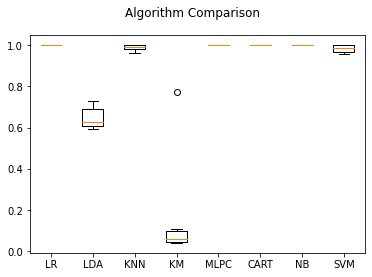

In [25]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

df = pd.read_csv("NAN chuville.csv", names=['Data','Chuva', 'Mare', 'Lua', 'Alagou'])
df['Chuva'] = df['Chuva'].fillna(df['Chuva'].median())

# X = df.iloc[:, 1:-1].values
# Y = df.iloc[:, 3].values
X_train = df.drop('Alagou',axis=1)
X_train = df.drop('Data',axis=1)
y = df['Alagou']

#Visualizando a quantidade de dados por classe antes da execução do SMOTE
np.bincount(y)

smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X_train, y)

# #Visualizando a quantidade de dados por classe após a execução do SMOTE
np.bincount(y_smt)

# Comparação de Modelos
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_smt)

X = scaler.transform(X_smt)

# Preparando modelos
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('KM', KMeans()))
models.append(('MLPC', MLPClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Avaliando cada modelo
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_smt, y_smt, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# Gráfico
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 1.000000 (0.000000)
LDA: 1.000000 (0.000000)
KNN: 0.994737 (0.004192)
KM: 0.118001 (0.083128)
MLPC: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.997784 (0.002073)


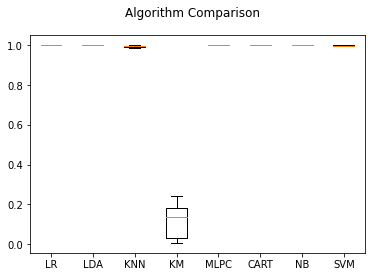

In [ ]:
# Comparação de Modelos
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
# Carregando dataset
dataset = pd.read_csv("chuville.csv", names=['Data','Chuva', 'Mare', 'Lua', 'Alagou'])
dataset.head()

X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, 3].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

# Preparando modelos
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('KM', KMeans()))
models.append(('MLPC', MLPClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Avaliando cada modelo
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# Gráfico
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# KNN
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv("chuville.csv", names=['Data','Chuva', 'Mare', 'Lua', 'Alagou'])
dataset.head()

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 3].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       277
           2       0.99      1.00      0.99       253
           3       1.00      1.00      1.00       277
           4       1.00      0.99      1.00       277

    accuracy                           1.00      1084
   macro avg       1.00      1.00      1.00      1084
weighted avg       1.00      1.00      1.00      1084

[[276   1   0   0]
 [  1 252   0   0]
 [  0   1 276   0]
 [  0   1   1 275]]


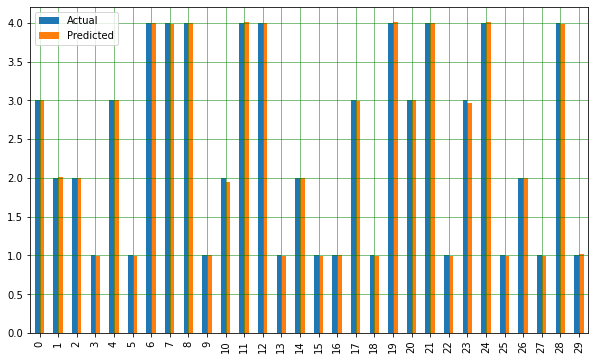

Mean Absolute Error: 0.008696248312796402
Mean Squared Error: 0.0002213467193035734
Root Mean Squared Error: 0.014877725609231184


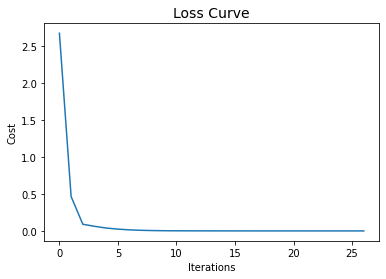

In [ ]:
# MLP Regressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

dataset = pd.read_csv("chuville.csv", names=['Data','Chuva', 'Mare', 'Lua', 'Alagou'])
dataset.head()

x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 3].values

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)
                                                
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

#Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter = 1000,activation = 'relu', solver = 'adam')
mlp_reg.fit(trainX_scaled, trainY)

#Avaliando o modelo
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

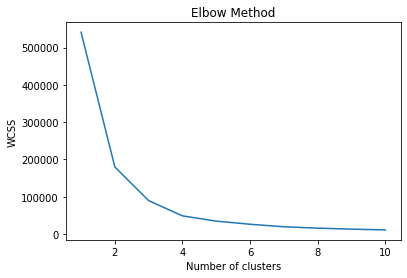

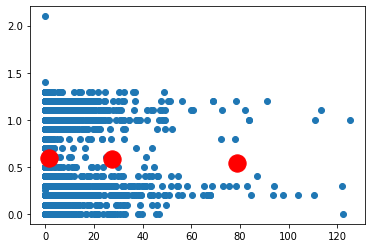

In [ ]:
# K-Means
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

dataset = pd.read_csv("chuville.csv", names=['Data','Chuva', 'Mare', 'Lua', 'Alagou'])
dataset.head()

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 3].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Accuracy: 1.00


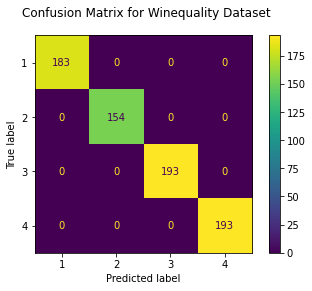

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       183
           2       1.00      1.00      1.00       154
           3       1.00      1.00      1.00       193
           4       1.00      1.00      1.00       193

    accuracy                           1.00       723
   macro avg       1.00      1.00      1.00       723
weighted avg       1.00      1.00      1.00       723



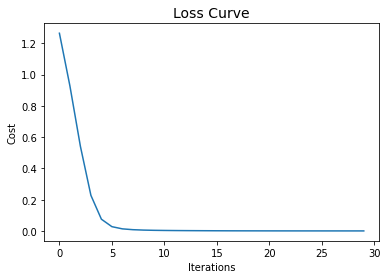

In [ ]:
# MLP Classifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

dataset = pd.read_csv("chuville.csv", names=['Data','Chuva', 'Mare', 'Lua', 'Alagou'])
dataset.head()

x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 3].values

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)
                                                
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

#Classificador
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter = 300,activation = 'relu', solver = 'adam')
mlp_clf.fit(trainX_scaled, trainY)

#Avaliando o modelo
y_pred = mlp_clf.predict(testX_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

fig = ConfusionMatrixDisplay.from_estimator(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()

print(classification_report(testY, y_pred))

plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()